In [9]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path += ["/workspace"]
from tools.graph import COLORS, get_scatter_style, set_font, tightargs
from scp.scp import port
set_font()
result_dir = "/workspace/github/ChiralityMisunderstanding/training_results"

# study_metrics

In [12]:
os.makedirs('metric_studies', exist_ok=True)
metrics = ['perfect', 'partial']

def draw_studies(figname, studies, studylabels=None, step_max=None, nshow=1, legend=True):
    if studylabels is None: studylabels = studies
    os.makedirs(f"metric_studies/{figname}", exist_ok=True)

    for m in metrics:
        fig, ax = plt.subplots(1,1,figsize=(7,5))
        step_max0 = step_max or 0
        for i, (study, label) in enumerate(zip(studies, studylabels)):
                df = pd.read_csv(f"{result_dir}/{study}/{m}_val.csv", index_col=0)['0']
                if step_max is not None:
                    df = df.loc[df.index <= step_max]
                step_max0 = max(step_max0, df.index.max())
                ax.plot(df.index, df.values, color=COLORS[i], label=label)
        if step_max is None: step_max = step_max0
        ax.set_xlabel('Step')
        ax.set_ylabel(m.capitalize()+" accuracy")
        ax.set_ylim(0, 1.02)
        ax.set_xlim(-step_max*0.02, step_max*1.02)
        if legend:
            ax.legend(fontsize=12)
        fig.tight_layout()
        fig.savefig(f"metric_studies/{figname}/{m}.png", **tightargs)
        if nshow: nshow -= 1
        else: plt.close(fig)

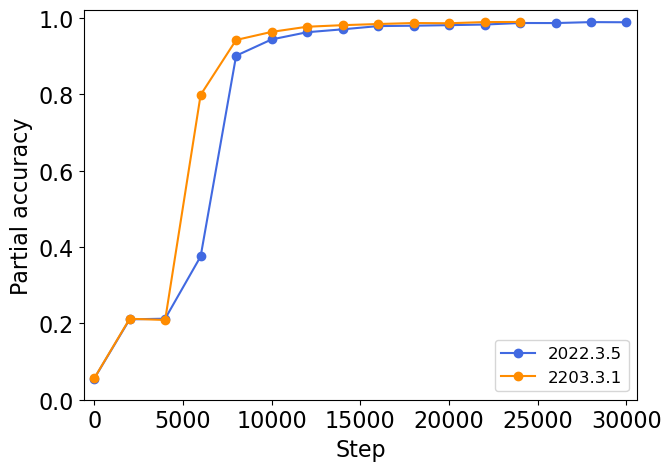

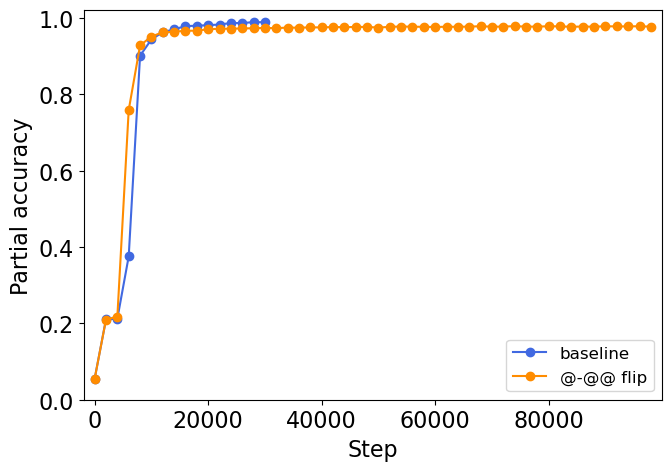

In [8]:
draw_studies("versions", 
    ["normal_2203", "normal_2303"],
    ["2022.3.5", "2203.3.1"])
draw_studies("aflips", 
    ["normal_2203", "aflip_2203"],
    ["baseline", "@-@@ flip"])
port("metric_studies", "/220625_transformer_zinc/230926_graph/.")

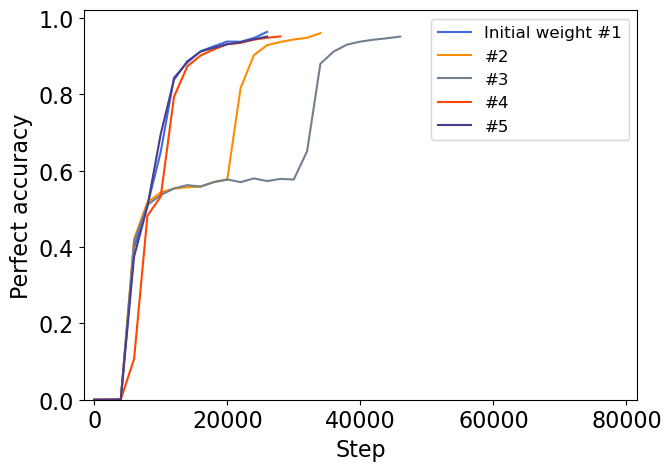

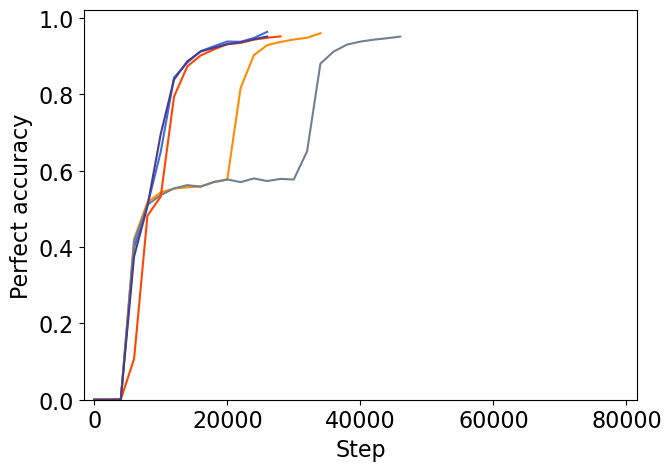

In [13]:
draw_studies("balance2s", 
    ["balanced2", "balance2_seed1", "balance2_seed2", "balance2_seed3", "balance2_seed4", ],
    ["Initial weight #1"]+[f"#{i}" for i in range(2, 6)], step_max=80000)
draw_studies("balance2s_nolegend", 
    ["balanced2", "balance2_seed1", "balance2_seed2", "balance2_seed3", "balance2_seed4", ],
    ["Initial weight #1"]+[f"#{i}" for i in range(2, 6)], step_max=80000, legend=False)

port("metric_studies", "/220625_transformer_zinc/230926_graph/.")


